<a href="https://colab.research.google.com/github/RahulJuluru2/unit4assignments/blob/main/U4W20_46_Resnet50_pre_trained_model_Dog_Breed_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment you will be able to :

- finetune the resnet model to determine a dog's breed from a given image


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/resnet50_dog_breed_classification.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description


This dataset has been extracted from [stanford](http://vision.stanford.edu/aditya86/ImageNetDogs/main.html) which contains images of breeds of dogs from around the world where each image is a subset from ImageNet

There are around 1,000 images, out of which 850 are used for training and 150 for testing

The dataset comprises 12 breeds of dogs:

    african_hunting_dog
    beagle
    bloodhound
    chow
    doberman
    eskimo_dog
    german_shepherd
    golden_retriever
    leonberg
    lhasa
    pug
    redbone

### Transfer Learning

Transfer learning is a machine learning technique in which a network that has been trained to perform a specific task is being reused (repurposed) as a starting point for another similar task.

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id= "2216842" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password= "9959488784" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U4W20_46_Resnet50_pre_trained_model_Dog_Breed_C" #name of the notebook
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/dog_breed_images.zip")
    ipython.magic("sx unzip dog_breed_images.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### 1. Importing required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchsummary import summary
from torchvision import datasets, transforms, models
from PIL import Image

### 2.  Data Preprocessing

In [ ]:
# Specify root data directory
data_dir = 'dog_breed_images'

batch_size = 10

# ResNet50 input is 224x224 by default
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
transform = transforms.Compose([transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),transforms.ToTensor()])

# Loading the data
trainset = datasets.ImageFolder(data_dir + '/Train', transform=transform)

testset = datasets.ImageFolder(data_dir + '/Test', transform=transform)

# Load the data. utils.dataloader is a package for loading the dataset 
train_loader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(testset, shuffle=True, batch_size=batch_size)

In [ ]:
# Check number of training and test images
dataset_sizes = {'Train': len(trainset), 'Test': len(testset)}
dataset_sizes

{'Train': 854, 'Test': 150}

In [ ]:
# Generate a batch of 10 images and labels
train_images, train_labels = next(iter(train_loader))
train_images.shape, train_labels.shape

(torch.Size([10, 3, 224, 224]), torch.Size([10]))

### 3. Visualizing the train images

In [ ]:
# labels Translator 
label_names = {v: k for k, v in trainset.class_to_idx.items()}
label_names

{0: 'african_hunting_dog',
 1: 'beagle',
 2: 'bloodhound',
 3: 'chow',
 4: 'doberman',
 5: 'eskimo_dog',
 6: 'german_shepherd',
 7: 'golden_retriever',
 8: 'leonberg',
 9: 'lhasa',
 10: 'pug',
 11: 'redbone'}

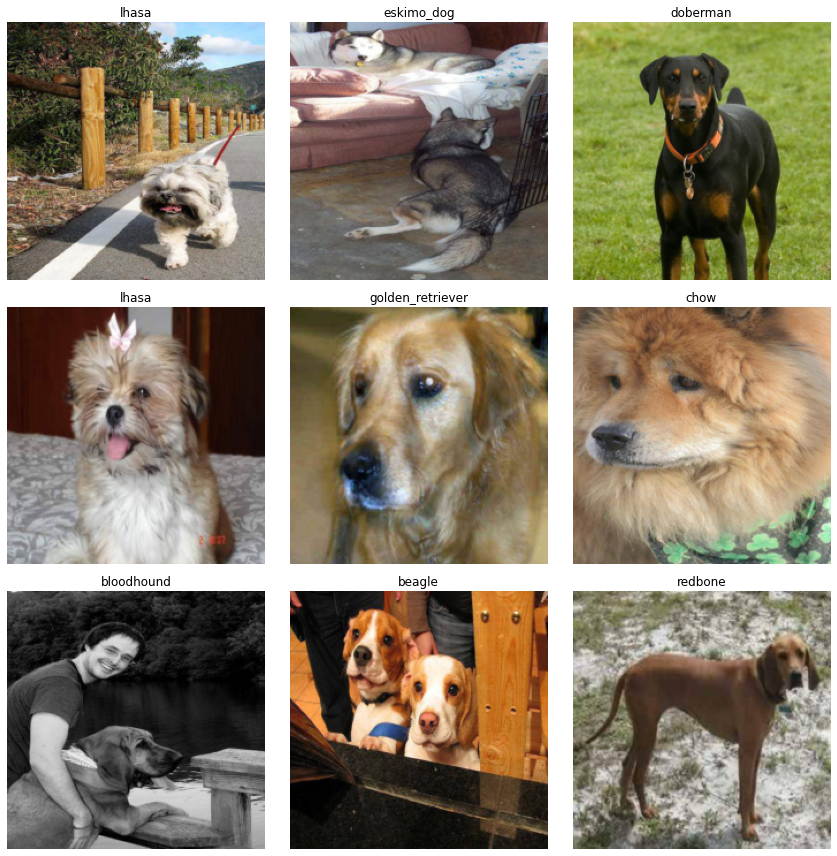

In [ ]:
# Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(label_names[train_labels[i].item()])
    axes[i].axis('off')

plt.tight_layout()

### 4. Initializing CUDA

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### 5. Loading Resnet50 model with pretrained weights

In [ ]:
basemodel = models.resnet50(pretrained=True)
print(basemodel)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
print(basemodel.fc)

Linear(in_features=2048, out_features=1000, bias=True)


### 6. Fine-tuning ResNet-50 

* The first layers of Resnet50 are used to extract high level general features
* The last couple of layers are used to perform classification (on a specific task)
* Copy the first trained layers (base model) and then add a new custom layers in the output to perform classification on a specific task


In [ ]:
# Freeze all layers
for param in basemodel.parameters():
    param.requires_grad = False

# Parameters of the below newly constructed modules have "requires_grad=True" 
basemodel.fc = nn.Sequential(nn.Linear(2048, 512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512, len(label_names)))

criterion = nn.CrossEntropyLoss()

# Optimize only the fully connected layer portion
optimizer = optim.SGD(basemodel.fc.parameters(), lr=0.003, momentum=0.5)
model = basemodel.to(device)

In [ ]:
# Print the summary of the model
from torchsummary import summary
summary(model, input_size=(3, IMG_HEIGHT, IMG_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

### 7. Train the deep learning model

In [ ]:
def train(net, trainloader, trainset, epochs):
    # keeping the network in train mode
    net.train()

    train_loss,  train_accuracy = [], []
    # Loop for no of epochs
    for epoch in range(epochs+1):
          running_loss = 0.0
          running_accuracy = 0.0

          # Iterate through all the batches in each epoch
          for images, labels in (trainloader):
                  images, labels = images.to(device), labels.to(device)

                  #-----------------Forward Pass----------------------
                  outputs = net(images)
                  loss = criterion(outputs, labels) # Calculating the loss

                  #-----------------Backward Pass---------------------
                  optimizer.zero_grad() # Zero the parameter gradients
                  loss.backward()
                  optimizer.step() # update the weights accordingly

                  running_loss+=loss.item()
                  
                  # Accuracy calculation
                  _, predicted = torch.max(outputs, 1)
                  running_accuracy += (predicted == labels).sum().item()

          #-----------------Log-------------------------------
          loss = running_loss/len(trainset)
          train_loss.append(loss)

          accuracy = 100 * (running_accuracy/len(trainset))
          train_accuracy.append(accuracy)
          print("======> epoch: {}/{}, Train Loss:{:.4f} Train Accuracy:{:.2f}".format(epoch,epochs,loss,accuracy))
    return net, train_loss, train_accuracy

In [ ]:
model, train_loss, train_accuracy = train(model, train_loader, trainset, 5)

======> epoch: 0/5, Train Loss:0.2267 Train Accuracy:40.28
======> epoch: 1/5, Train Loss:0.1742 Train Accuracy:66.86
======> epoch: 2/5, Train Loss:0.1229 Train Accuracy:78.92
======> epoch: 3/5, Train Loss:0.0887 Train Accuracy:86.53
======> epoch: 4/5, Train Loss:0.0669 Train Accuracy:90.05
======> epoch: 5/5, Train Loss:0.0547 Train Accuracy:90.63


### 8. Evaluate the trained deep learning model

In [ ]:
def test(net, testloader, testset):
    # keeping the network in evluation mode
    net.eval()
    
    predicted_label, original_label, test_images = [], [], []
    running_accuracy = 0.0

    # Iterate through all the batches
    for images, labels in (testloader):
            images, labels = images.to(device), labels.to(device)

            #-----------------Forward Pass----------------------
            outputs = net(images)
            
            # Accuracy calculation
            _, predicted = torch.max(outputs, 1)
            running_accuracy += (predicted == labels).sum().item()
            
            test_images.extend(images.cpu())
            predicted_label.extend(predicted.cpu())
            original_label.extend(labels.cpu())

    #-----------------Log-------------------------------
    accuracy = 100 * (running_accuracy/len(testset))
    print("======> Test Accuracy:{:.2f}".format(accuracy))
    return accuracy, predicted_label, original_label, test_images

In [ ]:
test_accuracy, predicted_label, original_label, test_images = test(model, test_loader, testset)

======> Test Accuracy:95.33


### 9. Visualizing the test images along with the predictions

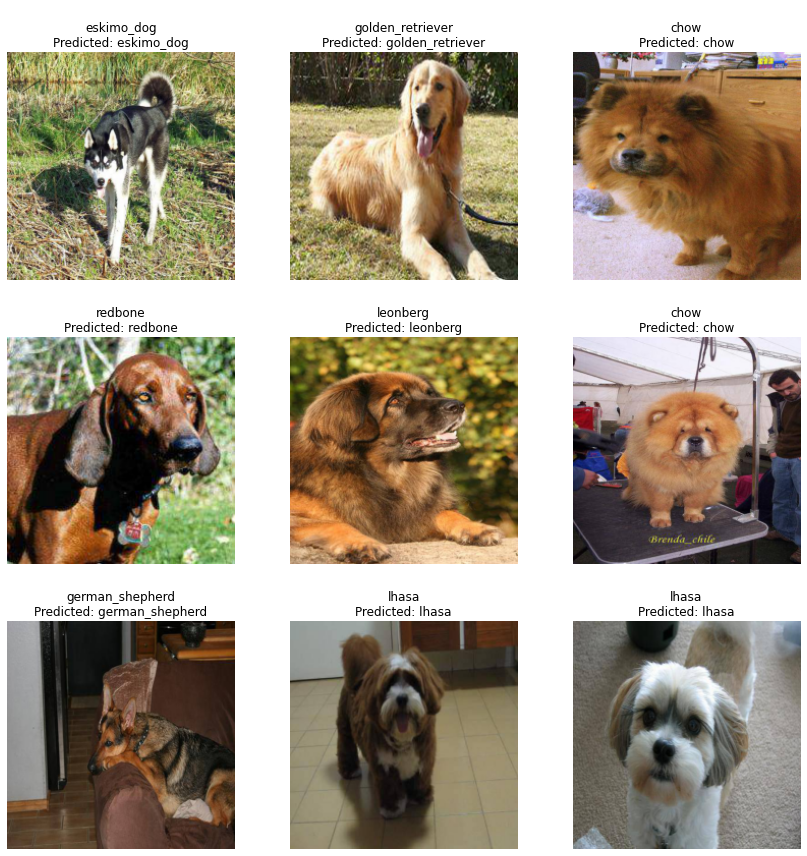

In [ ]:
# Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(test_images[i].permute(1, 2, 0))
    axes[i].set_title('\n{}\nPredicted: {}'.format(str(label_names[original_label[i].item()]),str(label_names[predicted_label[i].item()])))
    axes[i].axis('off')

plt.tight_layout()

### 10. Implementation of Gradio

In [ ]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 41.8 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 112 kB 67.1 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 270 kB 67.7 MB/s 
     |████████████████████████████████| 212 kB 72.0 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 2.3 MB 56.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 856 kB 64.6 MB/s 
     |████████████████████████████████| 594 kB 71

In [ ]:
labels = ['african_hunting_dog','beagle','bloodhound','chow','doberman','eskimo_dog','german_shepherd','golden_retriever','leonberg','lhasa','pug','redbone']

def predict(inp):
  inp = transforms.ToTensor()(inp).cuda().unsqueeze(0)
  with torch.no_grad():
    prediction = torch.nn.functional.softmax(model(inp)[0])
    confidences = {labels[i]: float(prediction[i]) for i in range(12)}    
  return confidences

In [ ]:
# initializing the input component
image = gr.inputs.Image(shape=(224, 224))
gr.Interface(fn=predict, 
             inputs= image,
             outputs=gr.outputs.Label(num_top_classes=12),
             capture_session=True,interpretation='default').launch()


# Insert a picture from the test data and observe the outcome

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://17722.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f207bd72f50>,
 'http://127.0.0.1:7860/',
 'https://17722.gradio.app')

### Please answer the questions below to complete the experiment:




In [ ]:
#@title State True or False: 'In this experiment, param.requires_grad = False' will freeze the parameters, so that no gradient will be calculated for it{run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True" #@param ["", "True","False"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything looks good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3259
Date of submission:  25 Sep 2022
Time of submission:  08:52:22
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
